In [2]:
import pandas as pd
import os

In [3]:
scoring = pd.read_pickle(os.path.join("..", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("..", "team_splits.pickle"))

In [4]:
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [9]:
three_years = scoring.loc[(scoring.year > 2000) &
                          (scoring.year < 2004)]

# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# Get three random players with complete history between 2001-2003
counts = three_years["playerID"].value_counts()
ids = counts[counts == 3].sample(3).index
print(ids)

# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[["playerID", "year", "G"]]
print(basic_df3)

Index(['kvashol01', 'hnidysh01', 'rucchst01'], dtype='object')
        playerID  year     G
10337  hnidysh01  2001   1.0
10338  hnidysh01  2002   0.0
10339  hnidysh01  2003   0.0
13364  kvashol01  2001  13.0
13365  kvashol01  2002  12.0
13366  kvashol01  2003  15.0
22227  rucchst01  2001   7.0
22228  rucchst01  2002  20.0
22229  rucchst01  2003  20.0


In [ ]:
basic_df3

In [10]:
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
hnidysh01,1.0,0.0,0.0
kvashol01,13.0,12.0,15.0
rucchst01,7.0,20.0,20.0


In [11]:
pivot.index

Index(['hnidysh01', 'kvashol01', 'rucchst01'], dtype='object', name='playerID')

In [12]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

In [13]:
pivot.index.name = None
pivot.columns.name = None

In [14]:
pivot

,2001,2002,2003
hnidysh01,1.0,0.0,0.0
kvashol01,13.0,12.0,15.0
rucchst01,7.0,20.0,20.0


In [15]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

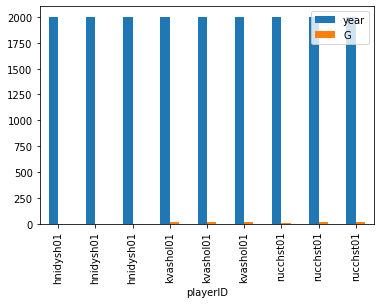

In [16]:
basic_df3.set_index("playerID").plot.bar();

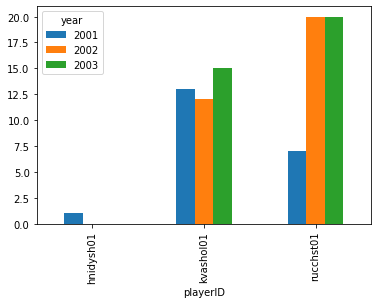

In [17]:
pivot.plot.bar();

In [18]:
pivot

year,2001,2002,2003
playerID,,,
hnidysh01,1.0,0.0,0.0
kvashol01,13.0,12.0,15.0
rucchst01,7.0,20.0,20.0


In [19]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,hnidysh01,1.0,0.0,0.0
1,kvashol01,13.0,12.0,15.0
2,rucchst01,7.0,20.0,20.0


In [20]:
pivot.melt()

,variable,value
0,playerID,hnidysh01
1,playerID,kvashol01
2,playerID,rucchst01
3,2001,1
4,2001,13
5,2001,7
6,2002,0
7,2002,12
8,2002,20
9,2003,0


In [21]:

pivot.melt(id_vars="playerID")

,playerID,variable,value
0,hnidysh01,2001,1.0
1,kvashol01,2001,13.0
2,rucchst01,2001,7.0
3,hnidysh01,2002,0.0
4,kvashol01,2002,12.0
5,rucchst01,2002,20.0
6,hnidysh01,2003,0.0
7,kvashol01,2003,15.0
8,rucchst01,2003,20.0


In [ ]:

pivot.melt(id_vars="playerID", var_name="year", value_name="goals")

In [ ]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002],
           var_name="year", value_name="goals")

In [ ]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

In [ ]:
try:
    larger_df3.pivot(index=["playerID", "tmID"],
                     columns="year", values="G")
except Exception as e:
    print(e)
        

In [ ]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

In [ ]:
test = larger_df3.pivot(index="playerID", columns="year",
                        values=["G", "A"])
test

In [ ]:
test.columns